<a href="https://colab.research.google.com/github/ayaamr11/Clustering-Algorithms/blob/main/ClusteringAlgorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports and Setup

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *
import seaborn as sns
import scipy.cluster.hierarchy as shc

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

import pandas as pd
from random import randint
from sklearn import datasets
import matplotlib.pyplot as plt
from scipy.spatial import distance
import numpy as np
import pylab



%matplotlib inline

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM1.csv")

df.head()



,x,y
0,1.206087,1.847686
1,0.351919,0.245691
2,1.201688,0.630774
3,0.733710,1.364328
4,1.150745,0.724892


# Prepare data

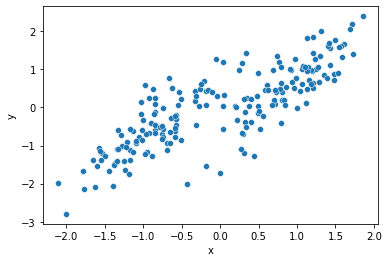

In [ ]:
sns.scatterplot(x='x',y='y',data=df)

In [ ]:
df_scaled=StandardScaler().fit_transform(df)


In [ ]:
df_scaled[:,0].shape

(200,)

# Elbow method

- implement elbow method to choose best K value for kmeans clustering

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

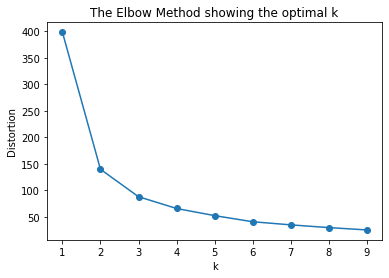

In [ ]:
plt.plot(K, distortions, marker = 'o')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Dendogram 

- plot dendrogram visualize the result of a hierarchical clustering if performed on data.

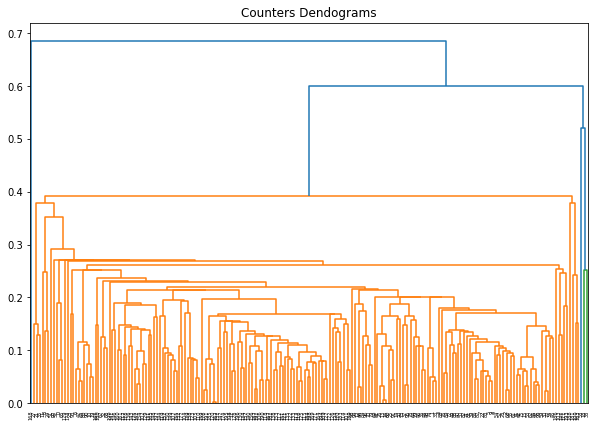

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_scaled , method='single',metric='euclidean'))

# Clustering

## KMeans clustering

- perform Kmeans clustering

In [ ]:
km = KMeans(3)
km.fit(df_scaled)
df["km"]  = km.labels_

- visualize output clusters

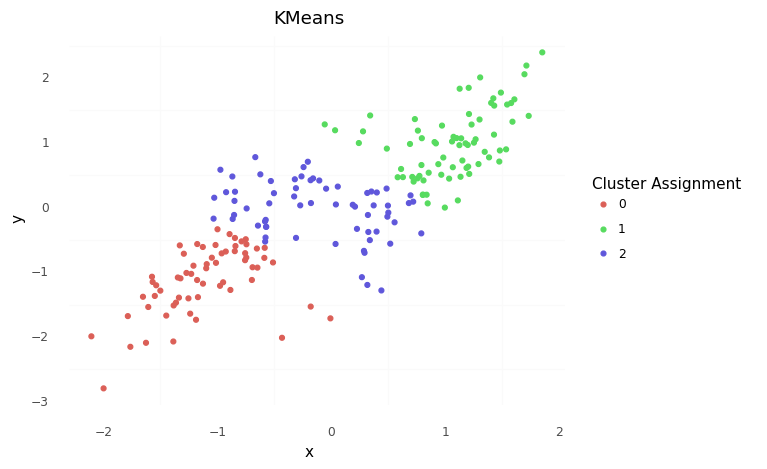

<ggplot: (8771405117469)>


In [ ]:
print(ggplot(df, aes(x = "x", y = "y",
                    color = "factor(km)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "KMeans"))


- evaluate cluster performance using silhouette score.

In [ ]:
preds = km.predict(df_scaled)
score = silhouette_score(df, preds)
print("silhouette score using kmeans is {}".format(score))

silhouette score using kmeans is 0.5992804803689248


## Agglomerative clustering

- perform agglomerative clustering.

In [ ]:
ag = AgglomerativeClustering(3)
ag.fit(df_scaled)
df["hac"] = ag.labels_

- visualize output clusters.

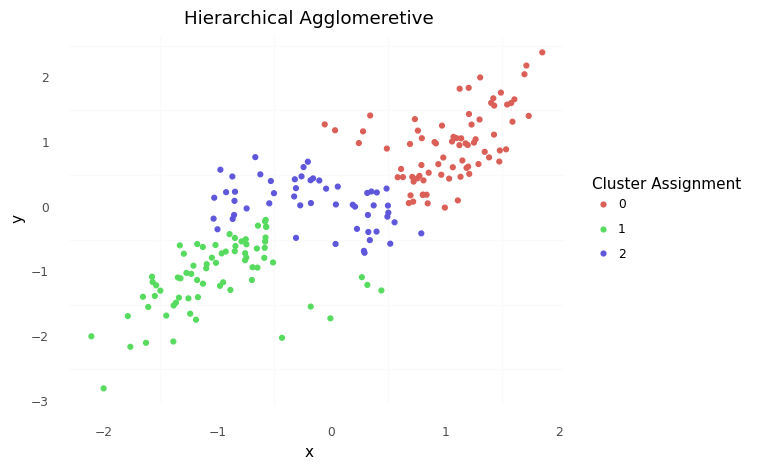

<ggplot: (8771409057373)>


In [ ]:
print(ggplot(df, aes(x = "x", y = "y",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Hierarchical Agglomeretive"))

- evaluate cluster performance using silhouette score.

In [ ]:
score = silhouette_score(df, ag.labels_)
print("silhouette score using AgglomerativeClustering is {}".format(score))

silhouette score using AgglomerativeClustering is 0.5719584590932214


## Gaussian Mixture clustering

- perform Gaussian Mixture clustering.

In [ ]:
gm = GaussianMixture(3)
gm.fit(df_scaled)
df["gm"]  = gm.predict(df[["x","y"]])

- visualize output clusters.

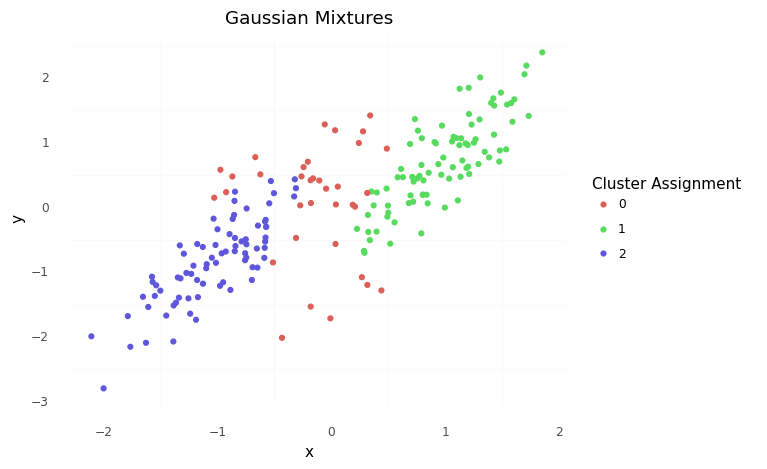

<ggplot: (8771409071549)>


In [ ]:
print(ggplot(df, aes(x = "x", y = "y",
                    color = "factor(gm)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Gaussian Mixtures"))

- evaluate cluster performance using silhouette score.

In [ ]:
preds = gm.predict(df[["x","y"]])
score = silhouette_score(df, preds)
print("silhouette score using GaussianMixture is {}".format(score))

silhouette score using GaussianMixture is 0.44315090117518624


## DBSAN clustering

- perform DBSCAN clustering.

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan.fit(df_scaled)
df["db"]  = dbscan.labels_

- visualize output clusters.

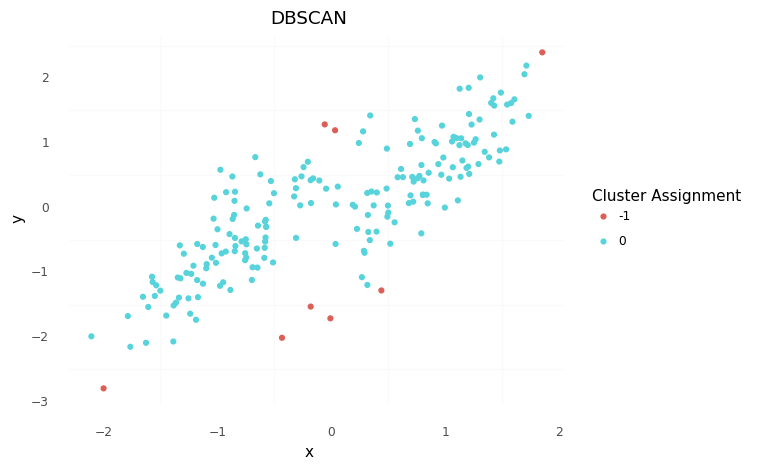

<ggplot: (8771405455081)>


In [ ]:
print(ggplot(df, aes(x = "x", y = "y",
                    color = "factor(db)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "DBSCAN"))


- evaluate cluster performance using silhouette score.

In [ ]:
score = silhouette_score(df_scaled, dbscan.labels_)
print("silhouette score using dbscan is {}".format(score))

silhouette score using dbscan is 0.2503816537124892


# Conclusion

- kmeans then Agglomerative clustering was the best clustering algorithms to perform having silhouette score of approximatly 6 and 0.57 and that was due to the behavior and distribution while the other clustering algorithms may perform better on other data.